# 로이터 뉴스카테고리 분류

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding,Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [24]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2) # 상위 단어 1000개

In [25]:
print(x_train.shape, x_test.shape)

(8982,) (2246,)


In [26]:
print(y_train.shape,y_test.shape)

(8982,) (2246,)


In [27]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [28]:
# 세부카테고리 : 정치,경제,스포츠...
y_train[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16], dtype=int64)

In [29]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [30]:
np.max(y_train)+1  # 46개의 뉴스 카테고리

46

In [31]:
# 데이터 확인

length = [len(x) for x in x_train ]
length

[87,
 56,
 139,
 224,
 101,
 116,
 100,
 100,
 82,
 106,
 31,
 59,
 65,
 316,
 527,
 76,
 114,
 17,
 91,
 77,
 231,
 108,
 83,
 29,
 95,
 110,
 23,
 373,
 114,
 354,
 133,
 222,
 571,
 155,
 83,
 208,
 170,
 269,
 74,
 19,
 23,
 78,
 21,
 377,
 104,
 299,
 89,
 56,
 94,
 139,
 118,
 36,
 137,
 107,
 83,
 66,
 70,
 112,
 88,
 51,
 83,
 123,
 17,
 185,
 84,
 52,
 102,
 73,
 106,
 486,
 107,
 82,
 263,
 172,
 491,
 190,
 143,
 62,
 26,
 88,
 114,
 38,
 85,
 112,
 793,
 104,
 25,
 21,
 101,
 28,
 25,
 81,
 135,
 73,
 62,
 18,
 90,
 266,
 91,
 64,
 409,
 92,
 319,
 166,
 85,
 200,
 152,
 474,
 60,
 58,
 584,
 71,
 273,
 51,
 255,
 28,
 171,
 143,
 91,
 46,
 110,
 77,
 162,
 24,
 52,
 175,
 61,
 95,
 97,
 259,
 112,
 73,
 94,
 17,
 650,
 23,
 88,
 309,
 105,
 89,
 41,
 314,
 54,
 374,
 67,
 160,
 75,
 207,
 373,
 84,
 87,
 74,
 98,
 136,
 256,
 95,
 50,
 108,
 52,
 100,
 233,
 86,
 68,
 47,
 73,
 158,
 113,
 23,
 100,
 80,
 202,
 104,
 122,
 101,
 95,
 118,
 253,
 192,
 80,
 183,
 29,
 604,


In [32]:
np.mean(length)

145.5398574927633

(array([9.680e+02, 1.324e+03, 1.435e+03, 1.482e+03, 7.290e+02, 3.690e+02,
        4.230e+02, 4.010e+02, 2.960e+02, 1.920e+02, 1.730e+02, 1.680e+02,
        1.660e+02, 8.200e+01, 8.800e+01, 7.600e+01, 6.300e+01, 5.300e+01,
        5.300e+01, 6.500e+01, 3.700e+01, 3.900e+01, 3.300e+01, 2.600e+01,
        3.500e+01, 2.900e+01, 3.000e+01, 1.300e+01, 2.300e+01, 2.400e+01,
        1.400e+01, 1.400e+01, 1.200e+01, 1.300e+01, 7.000e+00, 8.000e+00,
        5.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

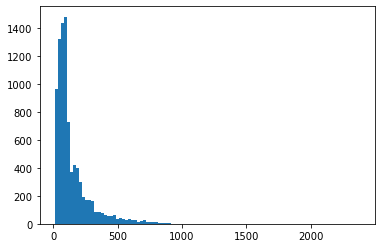

In [33]:
plt.hist(length, bins=100)

In [34]:
# 데이터 길이 일정하게 바꿔주기

x_train_seq = pad_sequences(x_train, maxlen= 200)
x_test_seq = pad_sequences(x_test, maxlen=200)

In [35]:
x_train_seq[:10]

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [  0,   0,   0, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 773,  17,  12],
       [  0,   0,   0, ..., 254,  17,  12],
       [  0,   0,   0, ...,   2,  17,  12]])

In [36]:
x_train_seq.shape

(8982, 200)

In [37]:
# y값 카테고리형 -> 원핫벡터로 만들어주기
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [38]:
# embedding사용하기

In [39]:
with tf.device("/GPU:0"):
    model = Sequential()
    model.add(Embedding(1000,30)) # 1000개단어 ->30 차원으로 바꾸겠다
    model.add(LSTM(100))
    model.add(Dense(46, activation='softmax')) # 46개 카테고리(y값)
    model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 30)          30000     
                                                                 
 lstm (LSTM)                 (None, 100)               52400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 87,046
Trainable params: 87,046
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [41]:
hist = model.fit(x_train_seq,y_train_oh, epochs=100, batch_size=64, validation_data=(x_test_seq,y_test_oh))

Epoch 1/100
141/141 [==============================] - 5s 16ms/step - loss: 2.5449 - accuracy: 0.3491 - val_loss: 2.3597 - val_accuracy: 0.3620
Epoch 2/100
141/141 [==============================] - 2s 12ms/step - loss: 2.1641 - accuracy: 0.4280 - val_loss: 1.9352 - val_accuracy: 0.4951
Epoch 3/100
141/141 [==============================] - 2s 13ms/step - loss: 1.8929 - accuracy: 0.5003 - val_loss: 1.8924 - val_accuracy: 0.5004
Epoch 4/100
141/141 [==============================] - 2s 12ms/step - loss: 1.7500 - accuracy: 0.5386 - val_loss: 1.8318 - val_accuracy: 0.4947
Epoch 5/100
141/141 [==============================] - 2s 12ms/step - loss: 1.8577 - accuracy: 0.5081 - val_loss: 1.7985 - val_accuracy: 0.5334
Epoch 6/100
141/141 [==============================] - 2s 13ms/step - loss: 1.6836 - accuracy: 0.5623 - val_loss: 1.6708 - val_accuracy: 0.5623
Epoch 7/100
141/141 [==============================] - 2s 12ms/step - loss: 1.6376 - accuracy: 0.5760 - val_loss: 1.7750 - val_accuracy:

141/141 [==============================] - 2s 13ms/step - loss: 0.6259 - accuracy: 0.8407 - val_loss: 1.1685 - val_accuracy: 0.7333
Epoch 58/100
141/141 [==============================] - 2s 13ms/step - loss: 0.5847 - accuracy: 0.8542 - val_loss: 1.2064 - val_accuracy: 0.7235
Epoch 59/100
141/141 [==============================] - 2s 12ms/step - loss: 0.5667 - accuracy: 0.8595 - val_loss: 1.1711 - val_accuracy: 0.7275
Epoch 60/100
141/141 [==============================] - 2s 13ms/step - loss: 0.5713 - accuracy: 0.8538 - val_loss: 1.2021 - val_accuracy: 0.7346
Epoch 61/100
141/141 [==============================] - 2s 12ms/step - loss: 0.5556 - accuracy: 0.8594 - val_loss: 1.1923 - val_accuracy: 0.7404
Epoch 62/100
141/141 [==============================] - 2s 13ms/step - loss: 0.5351 - accuracy: 0.8631 - val_loss: 1.1955 - val_accuracy: 0.7302
Epoch 63/100
141/141 [==============================] - 2s 13ms/step - loss: 0.5092 - accuracy: 0.8694 - val_loss: 1.2381 - val_accuracy: 0.731

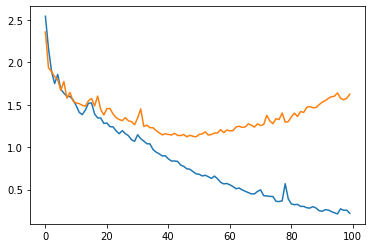

In [42]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [43]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Embedding(1000,30))
    model.add(Dropout(0.5))
    model.add(Conv1D(64,5, padding='valid', activation='relu', strides=1)) # Conv1D: 세로로만 필터 움직임
    model.add(MaxPooling1D(pool_size=4))
    model.add(LSTM(100,return_sequences= True)) # LSTM 두겹 쌓을때 return_sequences
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))          
    model.add(Dense(46, activation='softmax'))
    model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 30)          30000     
                                                                 
 dropout (Dropout)           (None, None, 30)          0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          9664      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, None, 100)         66000     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                      

In [44]:
model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [1]:
hist = model.fit(x_train_seq,y_train_oh, epochs=100, batch_size=64, validation_data=(x_test_seq,y_test_oh))

NameError: name 'model' is not defined